<a href="https://colab.research.google.com/github/ayushman1309/ML_LAB/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns



In [ ]:
# Step 2: Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
# Step 3: Flatten 28x28 images into 784-dimensional vectors
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)




In [ ]:
# Step 4: Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0



In [ ]:
# Step 5: Convert to binary labels (even = 0, odd = 1)
y_train_binary = (y_train % 2 != 0).astype(int)
y_test_binary = (y_test % 2 != 0).astype(int)



In [ ]:
# Step 6: Train Logistic Regression model
# Use 'saga' solver for large datasets and enable multi-threading
log_reg = LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1)
log_reg.fit(X_train, y_train_binary)

# Step 7: Make predictions
y_pred = log_reg.predict(X_test)

# Step 8: Evaluate the model
acc = accuracy_score(y_test_binary, y_pred)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")




✅ Test Accuracy: 82.56%


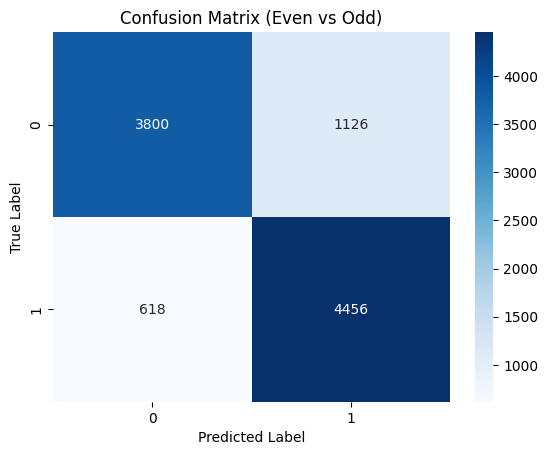


Classification Report:
              precision    recall  f1-score   support

    Even (0)       0.86      0.77      0.81      4926
     Odd (1)       0.80      0.88      0.84      5074

    accuracy                           0.83     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.83      0.83     10000



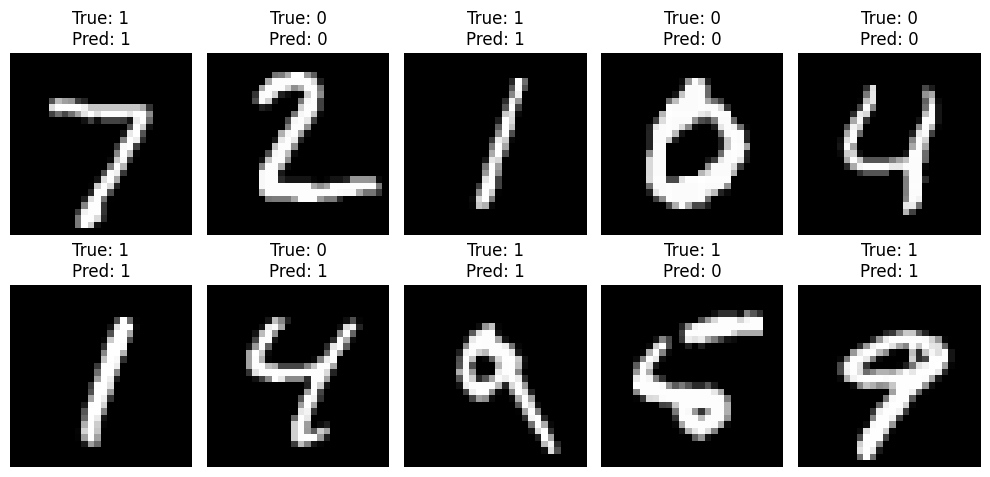

In [ ]:
# Step 9: Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Even vs Odd)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 10: Classification Report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred, target_names=['Even (0)', 'Odd (1)']))

# Step 11: Visualize a few predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test_binary[i]}\nPred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()